In [1]:
%matplotlib inline


# Gradient Boosting regression


Demonstrate Gradient Boosting on the Apartments dataset (`DALEX` package in R).

This example fits a Gradient Boosting model with least squares loss and
500 regression trees of depth 4.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble
from sklearn import datasets
from sklearn.metrics import mean_squared_error


In [3]:
df = pd.read_csv("./data/apartments.csv")

In [4]:
df.head()

,m2.price,construction.year,surface,floor,no.rooms,district
0,5897,1953,25,3,1,Srodmiescie
1,1818,1992,143,9,5,Bielany
2,3643,1937,56,1,2,Praga
3,3517,1995,93,7,3,Ochota
4,3013,1992,144,6,5,Mokotow


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
df['district_encoded'] = le.fit_transform(df['district'])
df = df.drop(['district'], axis=1)

In [7]:
X, y  = df.iloc[:,1:], df.iloc[:,0]
feature_names = df.columns.values[1:]

In [8]:
# #############################################################################
# Split data
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


C:\Users\pablo\Anaconda3\envs\cnb\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 33114.4229


Text(0,0.5,'Deviance')

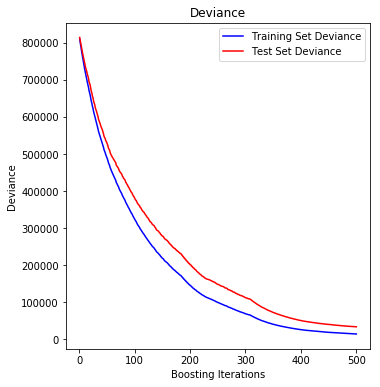

In [10]:
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')


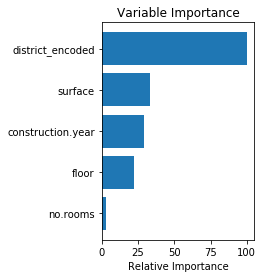

In [11]:
# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Convenience plot with ``partial_dependence_plots``
Custom 3d plot via ``partial_dependence``


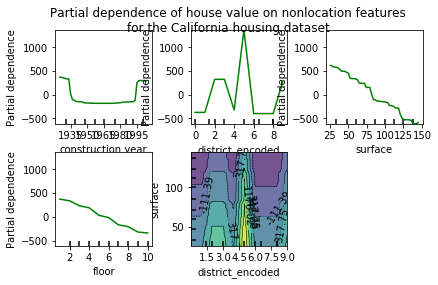

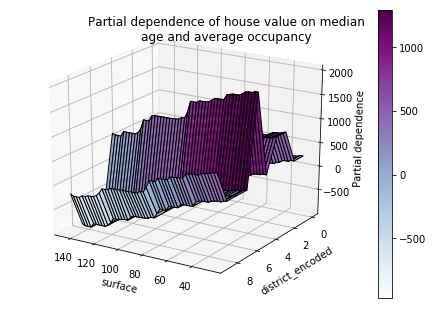

In [17]:
print('Convenience plot with ``partial_dependence_plots``')
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from mpl_toolkits.mplot3d import Axes3D


features = [0, 4, 1, 2, (4, 1)]
fig, axs = plot_partial_dependence(clf, X_train, features,                                   
                                       feature_names=feature_names,
                                       n_jobs=3, grid_resolution=50)
fig.suptitle('Partial dependence of house value on nonlocation features\n'
                 'for the California housing dataset')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

print('Custom 3d plot via ``partial_dependence``')
fig = plt.figure()

target_feature = (1, 4)
pdp, axes = partial_dependence(clf, target_feature,
                                   X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                           cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(feature_names[target_feature[0]])
ax.set_ylabel(feature_names[target_feature[1]])
ax.set_zlabel('Partial dependence')
    #  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of house value on median\n'
                 'age and average occupancy')
plt.subplots_adjust(top=0.9)

plt.show()
